## Name: Shreyash Shinkar
## Roll no: 31373
## DSBDAL Assignment 9 - Data Visualization II

### Importing all the necesssary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Reading the Titanic dataset using pandas

In [2]:
df = pd.read_csv("titanic.csv")

In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

male      577
female    314
Name: Sex, dtype: int64

c:\users\shreyder\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


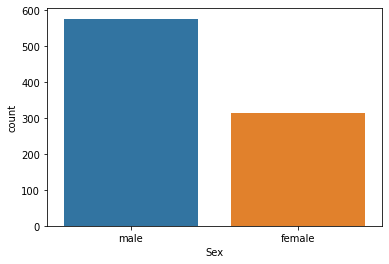

In [7]:
sns.countplot(df['Sex'])
print(df['Sex'].value_counts())

### From the countplot and value count of the "Sex" variable, we know that there are 577 male and 314 female passengers.

<AxesSubplot:xlabel='Sex', ylabel='Age'>

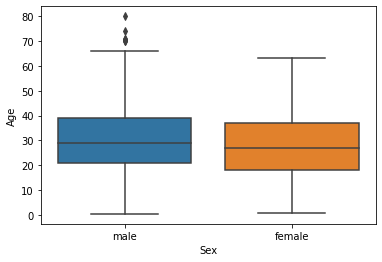

In [8]:
sns.boxplot(x="Sex", y="Age", data=df)

### Above is the boxplot for the distribution of age with respect to each gender. Here, it is observed that most of the passengers were in the age group of 20 - 40. There were some male passengers above the age of 60.

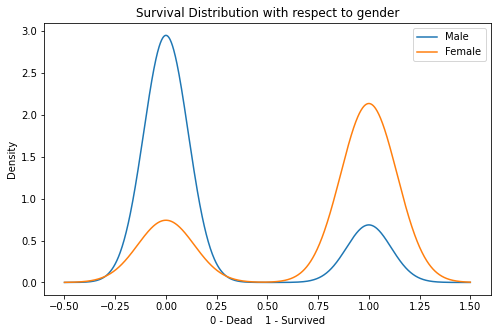

In [9]:
plt.figure(figsize=(8,5))
df.Survived[df.Sex == "male"].plot(kind='kde')    
df.Survived[df.Sex == "female"].plot(kind='kde')

plt.xlabel("0 - Dead    1 - Survived")    
plt.title("Survival Distribution with respect to gender")

plt.legend(('Male', 'Female'),loc='best') ;

### From the above KDE plot it is clear that a lot of male passengers did not survive and sacrificied their life for the female passengers.

<ipython-input-10-5882c69660c5>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df["Survived"]==1][df["Sex"]=="male"].count()[[1,4]])
<ipython-input-10-5882c69660c5>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df["Survived"]==1][df["Sex"]=="female"].count()[[1,4]])
<ipython-input-10-5882c69660c5>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df["Survived"]==0][df["Sex"]=="male"].count()[[1,4]])
<ipython-input-10-5882c69660c5>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df["Survived"]==0][df["Sex"]=="female"].count()[[1,4]])


Survived    109
Sex         109
dtype: int64
Survived    233
Sex         233
dtype: int64
Survived    468
Sex         468
dtype: int64
Survived    81
Sex         81
dtype: int64


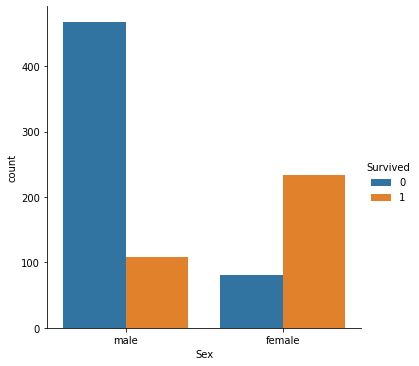

In [10]:
sns.catplot(x ="Sex", hue ="Survived", kind ="count", data = df)
print(df[df["Survived"]==1][df["Sex"]=="male"].count()[[1,4]])
print(df[df["Survived"]==1][df["Sex"]=="female"].count()[[1,4]])
print(df[df["Survived"]==0][df["Sex"]=="male"].count()[[1,4]])
print(df[df["Survived"]==0][df["Sex"]=="female"].count()[[1,4]])

### From the above catplot and counts, we observe that only 109 out of the 577 male passengers survived and 233 out of the 314 female passengers survived.

c:\users\shreyder\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

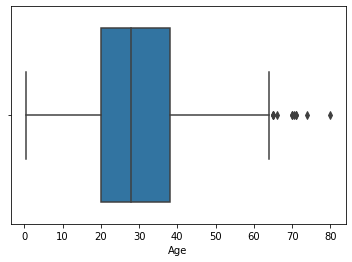

In [11]:
sns.boxplot("Age", data=df)

### From the boxplot of the "Age" variable we oberve that most of the passengers are in the age group of 20 to 40, and there are some outliers after 60. We can remove these outliers from better visualization of data.

In [12]:
df["Age"].isnull().sum()

177

### We also know that there are 177 NULL values in the "Age" variable

In [13]:
print(df["Age"].describe())
print("\nMedian value for Age =", df["Age"].median())
print("\nMedian value for Age =", df["Age"].mode())

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Median value for Age = 28.0

Median value for Age = 0    24.0
dtype: float64


### Above, we have found out the various statistical parameters related to the "Age" variable. But as the number of NULL values is large, we can simply drop the values while handling the outliers. Replacing too many values could change the data drastically.

### We will used the Inter-quartile range method to deal with the outliers

In [14]:
Q1=df['Age'].quantile(0.25)
Q3=df['Age'].quantile(0.75)
IQR=Q3-Q1
print("IQR(", IQR, ") =", "Q3(", Q3, ")- Q1(", Q1, ")")

IQR( 17.875 ) = Q3( 38.0 )- Q1( 20.125 )


In [15]:
lower_limit=Q1-IQR
upper_limit=Q3+IQR
lower_limit,upper_limit

(2.25, 55.875)

In [16]:
df[(df['Age']<lower_limit)|(df['Age']>upper_limit)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.00,0,0,113783,26.5500,C103,S
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q
33,34,0,2,"Wheadon, Mr. Edward H",male,66.00,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.00,0,1,113509,61.9792,B30,C
...,...,...,...,...,...,...,...,...,...,...,...,...
827,828,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,NaN,C
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.00,0,0,113572,80.0000,B28,NaN
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S
851,852,0,3,"Svensson, Mr. Johan",male,74.00,0,0,347060,7.7750,NaN,S


In [17]:
df_without_outliers=df[(df['Age']>lower_limit)&(df['Age']<upper_limit)]
df_without_outliers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<AxesSubplot:xlabel='Age'>

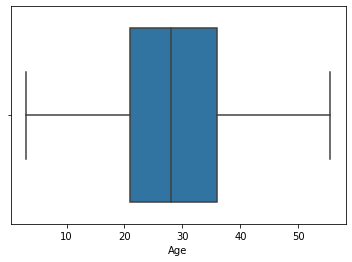

In [18]:
sns.boxplot(x=df_without_outliers['Age'])

### Now e have a dataframe without any outliers in the "Age" variable.

c:\users\shreyder\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='Age'>

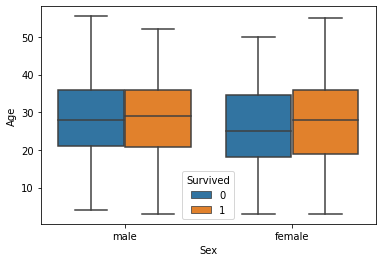

In [19]:
sns.boxplot(df_without_outliers['Sex'], df_without_outliers["Age"], df_without_outliers["Survived"])

### We have plotted the boxplot for "Age - Sex - Survived".

<ipython-input-20-3070d0b17ebc>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df1[df1["Survived"]==1][df1["Sex"]=="male"].count()[[1,4]])
<ipython-input-20-3070d0b17ebc>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df1[df1["Survived"]==1][df1["Sex"]=="female"].count()[[1,4]])
<ipython-input-20-3070d0b17ebc>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df1[df1["Survived"]==0][df1["Sex"]=="male"].count()[[1,4]])
<ipython-input-20-3070d0b17ebc>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df1[df1["Survived"]==0][df1["Sex"]=="female"].count()[[1,4]])


Survived    80
Sex         80
dtype: int64
Survived    183
Sex         183
dtype: int64
Survived    329
Sex         329
dtype: int64
Survived    59
Sex         59
dtype: int64


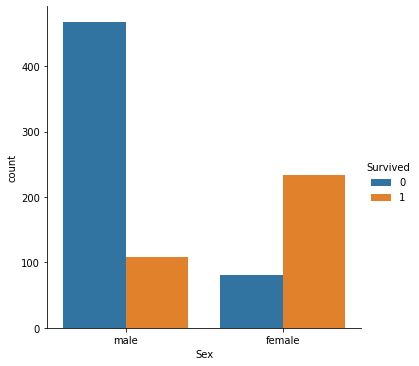

In [20]:
df1 = df_without_outliers
sns.catplot(x ="Sex", hue ="Survived", kind ="count", data = df)
print(df1[df1["Survived"]==1][df1["Sex"]=="male"].count()[[1,4]])
print(df1[df1["Survived"]==1][df1["Sex"]=="female"].count()[[1,4]])
print(df1[df1["Survived"]==0][df1["Sex"]=="male"].count()[[1,4]])
print(df1[df1["Survived"]==0][df1["Sex"]=="female"].count()[[1,4]])

### Some observations:
#### 1. We dropped various rows when we removed the outliers in the "Age" variable. As a result, the difference between the no. of male as well as female passengers who lost their lives and the ones who survived reduced.
#### 2. As observed in the boxplot, the median "Age" value for the passengers who survived/dies is close to 30. This is in accordance with the fact that most of our passengers were in the age group of 20 to 40.